# TP1

## Exercice 1

In [65]:
import time
import random 

# Initialisation
tab_ordonne = []
for i in range(0, 1000000):
    tab_ordonne.append(i)

# Recherche de manière séquentiel un élément dans un tableau
# Donne l'indice de l'élément recherché ou False s'il n'existe pas
def recherche_seq(tab, elemRech):
    
    i = 0
    for elem in tab:
        if(elem == elemRech):
            return i
        i = i + 1
    return False

# Recherche de manière dichotomique un élément dans un tableau trié
# Donne l'indice de l'élément recherché ou False s'il n'existe pas
def recherche_dich(tab, elemRech):
    m = len(tab) // 2
    if(elemRech != tab[m] and len(tab) == 1):
        return False
    if(elemRech == tab[m]): 
        return m
    if(tab[m] > elemRech):
        return recherche_dich(tab[0:m], elemRech)
    else:
        return recherche_dich(tab[m:len(tab)], elemRech)

### Trouver un élément qui y figure

#### Recherche séquentielle

In [66]:
tmp_debut = time.perf_counter()
recherche_seq(tab_ordonne, tab_ordonne[0])
tmp_fin = time.perf_counter()
print(f"Meilleur des cas | Temps : {tmp_fin - tmp_debut}")

Meilleur des cas | Temps : 7.970000001478184e-05


In [67]:
tmp_debut = time.perf_counter()
recherche_seq(tab_ordonne, tab_ordonne[-1])
tmp_fin = time.perf_counter()
print(f"Pire des cas | Temps : {tmp_fin - tmp_debut}")

Pire des cas | Temps : 0.09604119999994509


#### Recherche dichotomique

In [68]:
tmp_debut = time.perf_counter()
recherche_dich(tab_ordonne, tab_ordonne[(len(tab_ordonne)//2)])
tmp_fin = time.perf_counter()
print(f"Meilleur des cas | Temps : {tmp_fin - tmp_debut}")

Meilleur des cas | Temps : 9.089999980460561e-05


In [69]:
tmp_debut = time.perf_counter()
recherche_dich(tab_ordonne, tab_ordonne[0])
tmp_fin = time.perf_counter()
print(f"Pire des cas | Temps : {tmp_fin - tmp_debut}")

Pire des cas | Temps : 0.015084999999999127


### Trouver un élément qui n'y figure pas

#### Recherche séquentielle

In [70]:
tmp_debut = time.perf_counter()
recherche_seq(tab_ordonne, -10)
tmp_fin = time.perf_counter()
print(f"Elem qui n'existe pas | Temps : {tmp_fin - tmp_debut}")

Elem qui n'existe pas | Temps : 0.11078829999996742


#### Recherche dichotomique

In [71]:
tmp_debut = time.perf_counter()
recherche_dich(tab_ordonne, -10)
tmp_fin = time.perf_counter()
print(f"Elem qui n'existe pas | Temps : {tmp_fin - tmp_debut}")

Elem qui n'existe pas | Temps : 0.014996500000052038


## Exercice 2

In [72]:
import time
import numpy as np
import random
import sys

# Donne la représentation en une dimension d'une matrrice.
#. Il est aussi possible de la représenter par untableau à une dimension. 
# On ne s’intéresse alors qu’aux éléments de la matrice qui ne sont pasnuls. 
# Chaque case du tableau contient un tuple (i, j ,a) correspondant à l’indice de ligne, 
# l’indicede colonne, et la valeur d’un élément non nul.
def donne_representation_tableau_1dim(M):
    ret = []
    for i in range(len(M)):
        for j in range(len(M[i])):
            if(M[i][j] != 0):
                ret.append([i, j, M[i][j]])
    return ret

# Additionne les éléments d'une matrice qui est sous la représentation "tableau à une dimension"
def somme_elements_matrice_1dim(M_1dim):
    
    acc = 0
    for ligne in M_1dim:
        acc = acc + ligne[2]
    return acc

# Additinne les élements d'une matrice
def somme_elements_matrice(M):
    
    acc = 0
    for i in range(len(M)):
        for j in range(len(M[i])):
            acc = acc + M[i][j]
    return acc

# Algorithme qui prend en argument deux matrices et retourne la matrice
# produit.

def m_mul_matrix(Ma, Mb):
    
    if(np.size(Ma, 1) != np.size(Mb, 0)):
        print("Les matrices ne sont pas compatibles pour le produit.")
        return []
    
    result = np.zeros(shape=(len(Ma), len(Mb[0])))
    
    for i in range(len(Ma)): # nombre de ligne de A
        for j in range(len(Mb[0])): # nombre de colonne de B
            for k in range (len(Ma[0])): # nombre de colonne de A
                result[i][j] += Ma[i][k]*Mb[k][j]
               
    return result  

### Addition des éléments d'une matrice

In [79]:
A = np.empty((10, 10))
for i in range(len(A)):
    for j in range(len(A[i])):
        A[i][j] = random.randint(0, 8)

A_1dim = donne_representation_tableau_1dim(A)

print(f"Taille matrice : {len(A)} * {len(A)}")
print(f"Pourcentage de 0 : {(1 - len(A_1dim) / (len(A)*len(A))) * 100}%")
print(f"Taille mémoire matrice sous forme 2D : {sys.getsizeof(A)} octets")
print(f"Taille mémoire matrice sous forme 1D : {sys.getsizeof(A_1dim)} octets")

tmp_debut = time.perf_counter()
somme_elements_matrice(A)
tmp_fin = time.perf_counter()
print(f"Somme des éléments d'une matrice 2D | Temps : {tmp_fin - tmp_debut}")

tmp_debut = time.perf_counter()
somme_elements_matrice_1dim(A_1dim)
tmp_fin = time.perf_counter()
print(f"Somme des éléments d'une matrice 1D | Temps : {tmp_fin - tmp_debut}")

Taille matrice : 10 * 10
Pourcentage de 0 : 9.999999999999998%
Taille mémoire matrice sous forme 2D : 912 octets
Taille mémoire matrice sous forme 1D : 912 octets
Somme des éléments d'une matrice 2D | Temps : 0.0001708999998299987
Somme des éléments d'une matrice 2D | Temps : 9.130000012191886e-05


In [84]:
A = np.empty((10, 10))
for i in range(len(A)):
    for j in range(len(A[i])):
        A[i][j] = random.randint(0, 3)

A_1dim = donne_representation_tableau_1dim(A)

print(f"Taille matrice : {len(A)} * {len(A)}")
print(f"Pourcentage de 0 : {(1 - len(A_1dim) / (len(A)*len(A))) * 100}%")
print(f"Taille mémoire matrice sous forme 2D : {sys.getsizeof(A)} octets")
print(f"Taille mémoire matrice sous forme 1D : {sys.getsizeof(A_1dim)} octets")

tmp_debut = time.perf_counter()
somme_elements_matrice(A)
tmp_fin = time.perf_counter()
print(f"Somme des éléments d'une matrice 2D | Temps : {tmp_fin - tmp_debut}")

tmp_debut = time.perf_counter()
somme_elements_matrice_1dim(A_1dim)
tmp_fin = time.perf_counter()
print(f"Somme des éléments d'une matrice 1D | Temps : {tmp_fin - tmp_debut}")

Taille matrice : 10 * 10
Pourcentage de 0 : 20.999999999999996%
Taille mémoire matrice sous forme 2D : 912 octets
Taille mémoire matrice sous forme 1D : 768 octets
Somme des éléments d'une matrice 2D | Temps : 0.00022249999983614543
Somme des éléments d'une matrice 1D | Temps : 0.00017230000003110035


In [88]:
A = np.empty((10, 10))
for i in range(len(A)):
    for j in range(len(A[i])):
        A[i][j] = random.randint(0, 1)

A_1dim = donne_representation_tableau_1dim(A)

print(f"Taille matrice : {len(A)} * {len(A)}")
print(f"Pourcentage de 0 : {(1 - len(A_1dim) / (len(A)*len(A))) * 100}%")
print(f"Taille mémoire matrice sous forme 2D : {sys.getsizeof(A)} octets")
print(f"Taille mémoire matrice sous forme 1D : {sys.getsizeof(A_1dim)} octets")

tmp_debut = time.perf_counter()
somme_elements_matrice(A)
tmp_fin = time.perf_counter()
print(f"Somme des éléments d'une matrice 2D | Temps : {tmp_fin - tmp_debut}")

tmp_debut = time.perf_counter()
somme_elements_matrice_1dim(A_1dim)
tmp_fin = time.perf_counter()
print(f"Somme des éléments d'une matrice 1D | Temps : {tmp_fin - tmp_debut}")

Taille matrice : 10 * 10
Pourcentage de 0 : 48.0%
Taille mémoire matrice sous forme 2D : 912 octets
Taille mémoire matrice sous forme 1D : 528 octets
Somme des éléments d'une matrice 2D | Temps : 0.00013339999986783369
Somme des éléments d'une matrice 1D | Temps : 8.210000009967189e-05


## Exercice 4

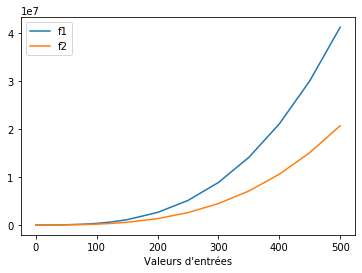

In [92]:
import matplotlib.pyplot as plt

def f1(n):
    ret = 0
    for i in range(1, n-1):
        for j in range(i+1,n):
            for k in range(1,j):
                ret = ret + 1
    return ret

def f2(n):
    ret = 0
    for i in range(1,n):
        for j in range(1,i):
            for k in range(j,i):
                ret = ret + 1
    return ret


x1 = [0,10,20,30,40,50, 75, 100, 125, 150, 200, 250, 300, 350, 400, 450, 500]
x2 = [0,10,20,30,40,50, 75, 100, 125, 150, 200, 250, 300, 350, 400, 450, 500]

y1 = []
y2 = []

for i in range(len(x2)):
    y1.append(f1(x1[i]))
    y2.append(f2(x2[i]))
    
plt.plot(x1, y1, label = "f1")
plt.plot(x2, y2, label = "f2")
plt.xlabel("Valeurs d'entrées")
plt.legend() 
plt.show()